<a href="https://colab.research.google.com/github/icampuzanov/SIS420-2_2023/blob/main/Primer_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('telecom_churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [3]:
x = data.iloc[:, 1:10]
y = data.iloc[:, 0]
x = x.to_numpy()
y = y.to_numpy()
print(x)

[[128.     1.     1.   ... 110.    89.     9.87]
 [107.     1.     1.   ... 123.    82.     9.78]
 [137.     1.     0.   ... 114.    52.     6.06]
 ...
 [ 28.     1.     0.   ... 109.    56.    14.44]
 [184.     0.     0.   ... 105.    50.     7.98]
 [ 74.     1.     1.   ... 113.   100.    13.3 ]]


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape

((2666, 9), (667, 9))

In [5]:
def featureNormalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [6]:
x, mu, sigma = featureNormalize(x_train)
print(x)

[[-6.97926631e-01  3.30128801e-01 -6.08846522e-01 ...  1.77436072e+00
  -9.83935044e-01  1.58077922e+00]
 [-3.24712318e-01  3.30128801e-01 -6.08846522e-01 ...  7.78099889e-01
  -9.47172702e-01 -8.72499770e-01]
 [-1.14578381e+00 -3.02912075e+00 -6.08846522e-01 ...  7.28286848e-01
  -2.48688193e-01 -6.94439198e-01]
 ...
 [ 4.96359171e-01  3.30128801e-01 -6.08846522e-01 ...  1.27623031e+00
  -7.32725703e-01  1.97548238e-03]
 [ 4.96359171e-01  3.30128801e-01 -6.08846522e-01 ...  2.07323897e+00
  -9.22664473e-01 -1.52143163e+00]
 [-1.09602190e+00  3.30128801e-01 -6.08846522e-01 ... -1.31404786e+00
   6.09099801e-01  4.84717477e-01]]


In [7]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [8]:
m, n = x.shape
x = np.concatenate([np.ones((m, 1)), x], axis=1)
print(x)

[[ 1.00000000e+00 -6.97926631e-01  3.30128801e-01 ...  1.77436072e+00
  -9.83935044e-01  1.58077922e+00]
 [ 1.00000000e+00 -3.24712318e-01  3.30128801e-01 ...  7.78099889e-01
  -9.47172702e-01 -8.72499770e-01]
 [ 1.00000000e+00 -1.14578381e+00 -3.02912075e+00 ...  7.28286848e-01
  -2.48688193e-01 -6.94439198e-01]
 ...
 [ 1.00000000e+00  4.96359171e-01  3.30128801e-01 ...  1.27623031e+00
  -7.32725703e-01  1.97548238e-03]
 [ 1.00000000e+00  4.96359171e-01  3.30128801e-01 ...  2.07323897e+00
  -9.22664473e-01 -1.52143163e+00]
 [ 1.00000000e+00 -1.09602190e+00  3.30128801e-01 ... -1.31404786e+00
   6.09099801e-01  4.84717477e-01]]


In [9]:
def calcularCosto(theta, X, y):
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [10]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [11]:
theta = np.zeros(9)

Text(0, 0.5, 'Costo')

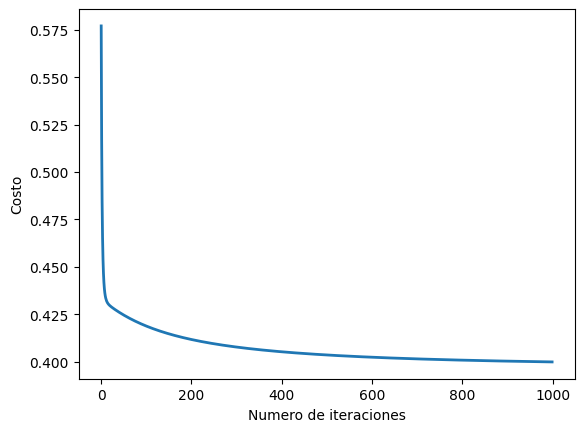

In [12]:
alpha = 0.00002
num_iters = 1000

theta, J_history = descensoGradiente(theta, x_train, y_train, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo')

In [13]:
import random as r
i = r.randint(0, len(x_test))
test_vals = x_test[i]
test_label = y_test[i]
test_vals = (test_vals - mu) / sigma
pred = round(sigmoid(np.dot(test_vals, theta)))
print(f"Valor real: {test_label}")
print(f"Valor predicho: {pred}")

Valor real: 0
Valor predicho: 1
